In [1]:
import warnings
warnings.filterwarnings('ignore')


##Importing the Dataset

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

df_data = pd.read_csv(r"C:\Users\yashn\Desktop\Projects\ML Project Dataset\Bonus Project\airline.csv")
df_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR → DEL,22:20,22-03-2019 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,10-06-2019 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,09-04-2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27-04-2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27-04-2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01-03-2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


##Dropping NULL Values

In [3]:
df_data=df_data.dropna(subset = ['Total_Stops'])
df_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR → DEL,22:20,22-03-2019 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,10-06-2019 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,09-04-2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27-04-2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27-04-2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01-03-2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


##Generating Profile Report

In [ ]:
pp.ProfileReport(df_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Separating Date, Month and Year of Departure

In [4]:
df_data['Date_Departure'] = (df_data['Date_of_Journey'].str.split('-').str[0]).astype(int)
df_data['Month_Departure'] = (df_data['Date_of_Journey'].str.split('-').str[1]).astype(int)

df_data['Year_Departure'] = (df_data['Date_of_Journey'].str.split('-').str[2]).astype(int)
df_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Departure,Month_Departure,Year_Departure
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR → DEL,22:20,22-03-2019 01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,01-05-2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,10-06-2019 04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,09-04-2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,27-04-2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,27-04-2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,01-03-2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [ ]:
df_data['Year_Departure'].describe()

count    10682.0
mean      2019.0
std          0.0
min       2019.0
25%       2019.0
50%       2019.0
75%       2019.0
max       2019.0
Name: Year_Departure, dtype: float64

##Dropping Unnecessary Columns

In [5]:
df_data=df_data.drop(['Year_Departure',"Date_of_Journey","Additional_Info"],axis=1)
df_data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_Departure,Month_Departure
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,22-03-2019 01:10,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,10-06-2019 04:25,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648,1,3


##Separating Date, Month and Year of Arrival

In [6]:
month=[]
day=[]
time=[]
for row in df_data.itertuples():
  if '-' in row.Arrival_Time:
    h=row.Arrival_Time.split('-')[-1].split(' ')[-1]
    time.append(h)
    k=int(row.Arrival_Time.split('-')[0])
    if k<int(row.Date_Departure):
      k=int(row.Date_Departure)+1
    month.append(int(row.Arrival_Time.split('-')[1]))
    day.append(k)
  else:
    time.append(row.Arrival_Time)
    month.append(int(row.Month_Departure))
    day.append(int(row.Date_Departure))
df_data['Date_Arrival']=day
df_data['Month_Arrival']=month
df_data['Arrival_Time']=time
df_data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_Departure,Month_Departure,Date_Arrival,Month_Arrival
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,3897,24,3,25,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,13882,9,6,10,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,5,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107,9,4,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145,27,4,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229,27,4,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648,1,3,1,3


##Encoding the Number of stops

In [7]:
no_stops=[]
for row in df_data.itertuples():
  if row.Total_Stops=='non-stop':
    no_stops.append(0)
  elif row.Total_Stops=='1 stop':
    no_stops.append(1)
  elif row.Total_Stops=='2 stops':
    no_stops.append(2)
  elif row.Total_Stops=='3 stops':
    no_stops.append(3)
  elif row.Total_Stops=='4 stops':
    no_stops.append(4)
  else:
    print(row)
    no_stops.append('Missing')
df_data['Total_Stops']=no_stops
df_data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_Departure,Month_Departure,Date_Arrival,Month_Arrival
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,3897,24,3,25,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7662,1,5,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,13882,9,6,10,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,6218,12,5,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,13302,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,4107,9,4,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,4145,27,4,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,7229,27,4,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,12648,1,3,1,3


In [8]:
df_data["Hour_Departure"] = pd.to_datetime(df_data["Dep_Time"]).dt.hour

df_data["Hour_Arrival"] = pd.to_datetime(df_data.Arrival_Time).dt.hour

# Extracting Minutes
df_data["Minute_Arrival"] = pd.to_datetime(df_data.Arrival_Time).dt.minute
df_data["Minute_Departure"] = pd.to_datetime(df_data["Dep_Time"]).dt.minute

df_data.drop(["Arrival_Time","Dep_Time"], axis = 1, inplace = True)


In [ ]:
df_data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Date_Departure,Month_Departure,Date_Arrival,Month_Arrival,Hour_Departure,Hour_Arrival,Minute_Arrival,Minute_Departure
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,3897,24,3,25,3,22,1,10,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,1,5,5,13,15,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,13882,9,6,10,6,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,6218,12,5,12,5,18,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,13302,1,3,1,3,16,21,35,50


In [9]:
duration = list(df_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
df_data["Hours_Duration"] = duration_hours
df_data["Minute_Duration"] = duration_mins
df_data.drop(["Duration"], axis = 1, inplace = True)
df_data.head(5)

,Airline,Source,Destination,Route,Total_Stops,Price,Date_Departure,Month_Departure,Date_Arrival,Month_Arrival,Hour_Departure,Hour_Arrival,Minute_Arrival,Minute_Departure,Hours_Duration,Minute_Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,25,3,22,1,10,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,1,5,1,5,5,13,15,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,9,6,10,6,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,12,5,12,5,18,23,30,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,1,3,1,3,16,21,35,50,4,45


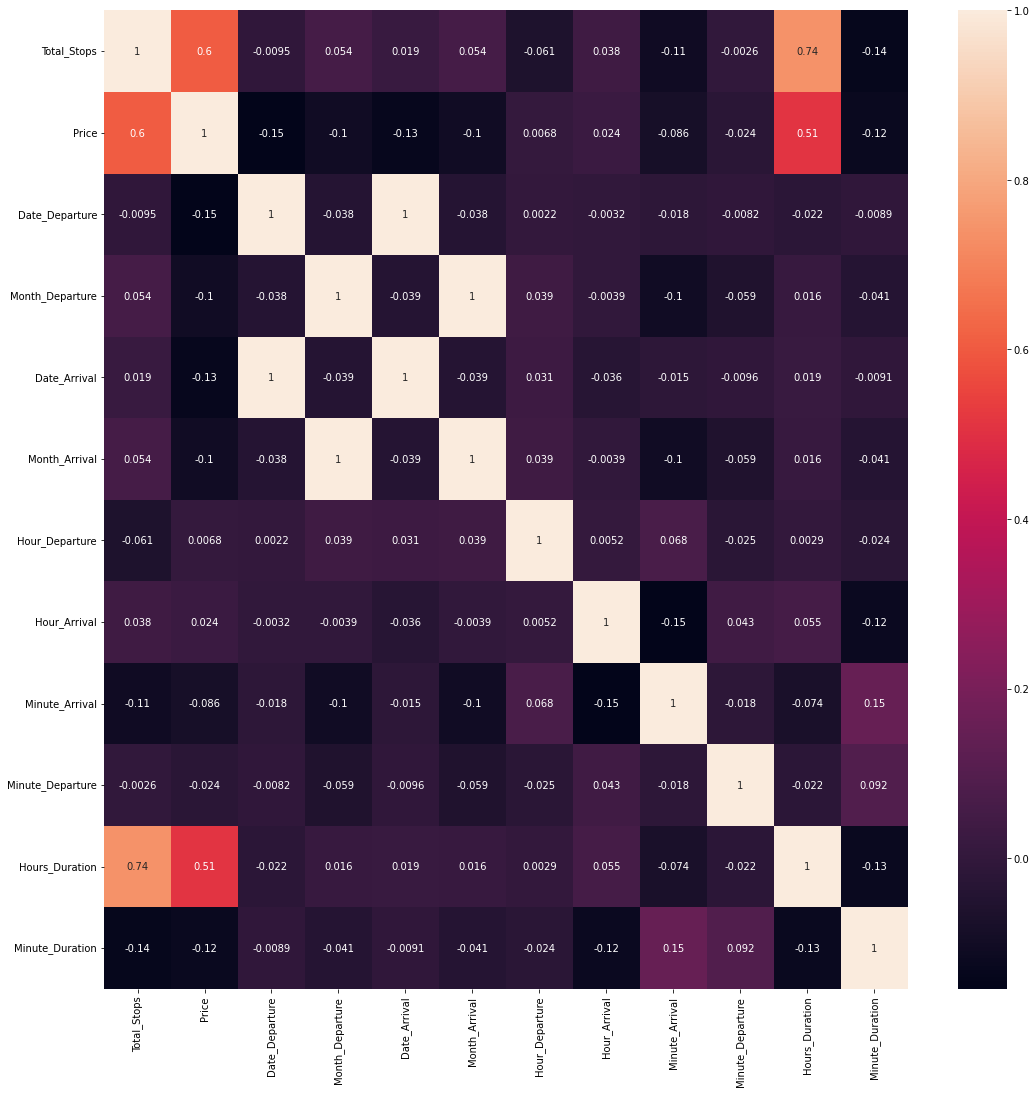

In [ ]:
%matplotlib inline
plt.figure(figsize = (18,18))
sns.heatmap(df_data.corr(), annot = True)

plt.show()


##Variation of Flight Price with respect to number of Number of Stops

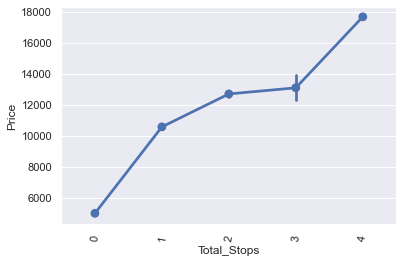

In [10]:
%matplotlib inline
sns.set_theme(style="darkgrid")
sns.pointplot(y = "Price", x = "Total_Stops", data = df_data.sort_values("Price", ascending = False))
plt.xticks(rotation=80);
plt.show()


##Variation of Flight Price with respect to Source

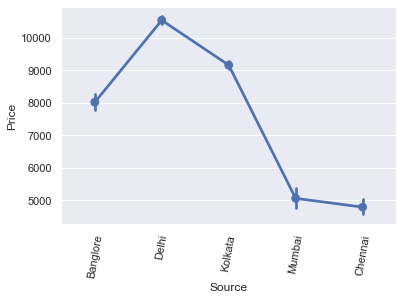

In [11]:
%matplotlib inline
sns.set_theme(style="darkgrid")
sns.pointplot(y = "Price", x = "Source", data = df_data.sort_values("Price", ascending = False))
plt.xticks(rotation=80);
plt.show()


##Variation of Flight Price with repsect to Destination

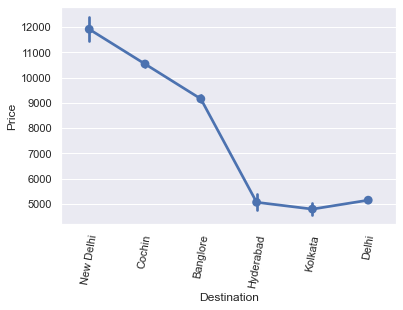

In [ ]:
%matplotlib inline
sns.set_theme(style="darkgrid")
sns.pointplot(y = "Price", x = "Destination", data = df_data.sort_values("Price", ascending = False))
plt.xticks(rotation=80);
plt.show()

##Variation of flight Price with respect to Airline

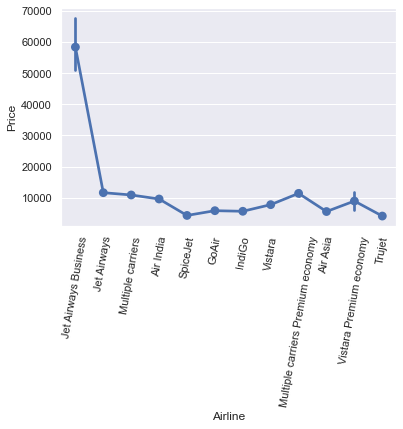

In [ ]:
%matplotlib inline
sns.set_theme(style="darkgrid")
ax=sns.pointplot(y = "Price", x = "Airline", data = df_data.sort_values("Price", ascending = False))
plt.xticks(rotation=80);
plt.show()

##Variation of Flight Price with respect to Duration Hours

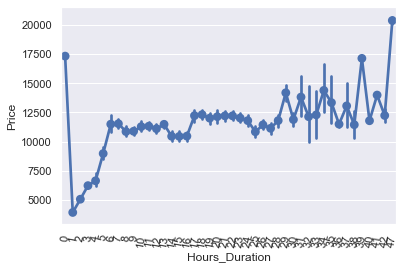

In [14]:
%matplotlib inline
sns.set_theme(style="darkgrid")
ax=sns.pointplot(y = "Price", x = "Hours_Duration", data = df_data.sort_values("Price", ascending = False))
plt.xticks(rotation=80);
plt.show()

In [ ]:
df_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
df_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
df_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

##Using One Hot Encoding for Features Airlines, Source and Destination

In [ ]:
Airline = df_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

Source = df_data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)

Destination = df_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
df_data = pd.concat([df_data, Airline, Source, Destination], axis = 1)

df_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
df_data.head()

,Route,Total_Stops,Price,Date_Departure,Month_Departure,Date_Arrival,Month_Arrival,Hour_Departure,Hour_Arrival,Minute_Arrival,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,3897,24,3,25,3,22,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,7662,1,5,1,5,5,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2,13882,9,6,10,6,9,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1,6218,12,5,12,5,18,23,30,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1,13302,1,3,1,3,16,21,35,...,0,0,0,0,0,0,0,0,0,1


##Checking number of Different Stops in Flight Route

In [ ]:
route=df_data['Route']
lst=[]
for i in route:
  j=i.split(sep='→')
  for k in j:
    if k not in lst:
      lst.append(k)
print("Different Number of Stops in Route is:",len(lst))
print(lst)



Different Number of Stops in Route is: 52
['BLR ', ' DEL', 'CCU ', ' IXR ', ' BBI ', ' BLR', 'DEL ', ' LKO ', ' BOM ', ' COK', ' NAG ', ' BLR ', 'MAA ', ' CCU', ' AMD ', ' PNQ ', ' CCU ', ' COK ', ' IDR ', ' GAU ', ' DEL ', ' MAA ', ' HYD ', 'BOM ', ' HYD', ' BHO ', ' JAI ', ' ATQ ', ' JDH ', ' GOI ', ' BDQ ', ' TRV ', ' IXU ', ' IXB ', ' UDR ', ' RPR ', ' DED ', ' VGA ', ' VNS ', ' ISK ', ' IXC ', ' PAT ', ' JLR ', ' KNU ', ' GWL ', ' VTZ ', ' NDC ', ' HBX ', ' IXZ ', ' IMF ', ' IXA ', ' STV ']


In [ ]:
df_data.drop(["Route"], axis = 1, inplace = True)
df_data

,Total_Stops,Price,Date_Departure,Month_Departure,Date_Arrival,Month_Arrival,Hour_Departure,Hour_Arrival,Minute_Arrival,Minute_Departure,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,25,3,22,1,10,20,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,1,5,5,13,15,50,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,10,6,9,4,25,25,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,12,5,18,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,1,3,16,21,35,50,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,9,4,19,22,25,55,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,27,4,20,23,20,45,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,27,4,8,11,20,20,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,1,3,11,14,10,30,...,0,0,0,0,0,0,0,0,0,1


In [ ]:

X_col=[]
for i in df_data.columns:
  if i!='Price':
    X_col.append(i)
X=df_data[X_col].values

Y=df_data["Price"].values

X,Y

(array([[ 0, 24,  3, ...,  0,  0,  1],
        [ 2,  1,  5, ...,  0,  0,  0],
        [ 2,  9,  6, ...,  0,  0,  0],
        ...,
        [ 0, 27,  4, ...,  0,  0,  0],
        [ 0,  1,  3, ...,  0,  0,  1],
        [ 2,  9,  5, ...,  0,  0,  0]], dtype=int64),
 array([ 3897,  7662, 13882, ...,  7229, 12648, 11753], dtype=int64))

In [ ]:
from sklearn.model_selection import train_test_split
X_t, X_test, Y_t, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 8)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_t, Y_t, test_size = 0.2, random_state = 8)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


##Model 1: Random Forest Regressor

In [ ]:
r2_train=[]   #Stores the r2 error on Training Data
r2_test=[]    #Stores the r2 error on Test Data
r2_cv=[]      #Stores the r2 error on CV Data

rmse_train=[] #Stores the rmse error on Training Data
rmse_test=[]  #Stores the rmse error on Test Data
rmse_cv=[]    #Stores the rmse error on CV Data


In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR
reg1=RFR()

param = {'n_estimators': [500,750,1000],
               'max_depth': [10,20,25],
               'min_samples_split': [10, 15],
               'min_samples_leaf': [2,5]}
grid1 = GridSearchCV(estimator = reg1, param_grid = param, scoring='r2',cv = 5, verbose=2, n_jobs = 1)
grid1.fit(X_train,Y_train)
optimised_rf = grid1.best_estimator_
print(optimised_rf)
print('Best Score: %s' % grid1.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   9.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   7.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   8.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   9.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   8.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=  11.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=  12.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=  12.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=  11.8s
[CV] END max_depth=1

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse
from sklearn.ensemble import RandomForestRegressor as RFR


modelrf = RFR(max_depth=25, min_samples_leaf=2, min_samples_split=10,n_estimators=1000)
modelrf.fit(X_train,Y_train)
y_predrftr=modelrf.predict(X_train)
y_predrfcv=modelrf.predict(X_cv)
y_predrfts=modelrf.predict(X_test)

rmserftr=rmse(Y_train,y_predrftr,squared=False)
rmserfts=rmse(Y_test,y_predrfts,squared=False)
rmserfcv=rmse(Y_cv,y_predrfcv,squared=False)

rmse_train.append(rmserftr)
rmse_test.append(rmserfts)
rmse_cv.append(rmserfcv)

print("On Random-Forest Model, RMSE scores are:")
print("Train:",rmserftr)
print("CV:",rmserfcv)
print("Test:",rmserfts)
r2rftr=r2_score(Y_train, y_predrftr)
r2rfcv=r2_score(Y_cv, y_predrfcv)
r2rfts=r2_score(Y_test, y_predrfts)

r2_train.append(r2rftr)
r2_test.append(r2rfts)
r2_cv.append(r2rfcv)

print("On Random-Forest Model, R2 scores are:")
print("Train:",r2rftr)
print("CV:",r2rfcv)
print("Test:",r2rfts)

On Random-Forest Model, RMSE scores are:
Train: 1423.197645962446
CV: 1961.3531998152441
Test: 2023.7773135208254
On Random-Forest Model, R2 scores are:
Train: 0.9066120310913595
CV: 0.8066505349973406
Test: 0.8048107888010303


##Model 1: SVM Regressor

In [ ]:
from sklearn.svm import SVR

param = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],'C' : [1,10,100],'degree' : [3,5,10]}
modelsvr = SVR()

grid2 = GridSearchCV(modelsvr,param,scoring='r2',cv = 5, verbose=2, n_jobs = 1)
grid2.fit(X_train,Y_train)
optimised_svr = grid2.best_estimator_
print(optimised_svr)
print('Best Score: %s' % grid2.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .......................C=1, degree=3, kernel=linear; total time=   2.2s
[CV] END .......................C=1, degree=3, kernel=linear; total time=   1.7s
[CV] END .......................C=1, degree=3, kernel=linear; total time=   2.6s
[CV] END .......................C=1, degree=3, kernel=linear; total time=   2.6s
[CV] END .......................C=1, degree=3, kernel=linear; total time=   2.7s
[CV] END .........................C=1, degree=3, kernel=poly; total time=   2.4s
[CV] END .........................C=1, degree=3, kernel=poly; total time=   2.5s
[CV] END .........................C=1, degree=3, kernel=poly; total time=   2.7s
[CV] END .........................C=1, degree=3, kernel=poly; total time=   3.1s
[CV] END .........................C=1, degree=3, kernel=poly; total time=   2.5s
[CV] END ..........................C=1, degree=3, kernel=rbf; total time=   3.9s
[CV] END ..........................C=1, degree=

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse
from sklearn.svm import SVR


modelsvr = SVR(C=100, kernel='linear')
modelsvr.fit(X_train,Y_train)
y_predsvrtr=modelsvr.predict(X_train)
y_predsvrcv=modelsvr.predict(X_cv)
y_predsvrts=modelsvr.predict(X_test)

rmsesvrtr=rmse(Y_train,y_predsvrtr,squared=False)
rmsesvrts=rmse(Y_test,y_predsvrts,squared=False)
rmsesvrcv=rmse(Y_cv,y_predsvrcv,squared=False)

rmse_train.append(rmsesvrtr)
rmse_test.append(rmsesvrts)
rmse_cv.append(rmsesvrcv)

print("On SVR-Model, RMSE scores are:")
print("Train:",rmsesvrtr)
print("CV:",rmsesvrcv)
print("Test:",rmsesvrts)
r2svrtr=r2_score(Y_train, y_predsvrtr)
r2svrcv=r2_score(Y_cv, y_predsvrcv)
r2svrts=r2_score(Y_test, y_predsvrts)

r2_train.append(r2svrtr)
r2_test.append(r2svrts)
r2_cv.append(r2svrcv)

print("On SVR-Model, R2 scores are:")
print("Train:",r2svrtr)
print("CV:",r2svrcv)
print("Test:",r2svrts)

On SVR-Model, RMSE scores are:
Train: 3179.616671077659
CV: 2978.6248962580707
Test: 3169.091341587801
On SVR-Model, R2 scores are:
Train: 0.5338668096774218
CV: 0.5540738013260698
Test: 0.5213700438725375


##Model 3: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

modellr = LogisticRegression()

param = {'penalty':['l1','l2'],'C':[0.1,0.3,1,3],'max_iter':[100,500,1000]}
grid3 = GridSearchCV(modellr,param,scoring='r2',cv =5, verbose=2, n_jobs = 1)
grid3.fit(X_train,Y_train)
optimised_lr = grid3.best_estimator_
print(optimised_lr)
print('Best Score: %s' % grid3.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ....................C=0.1, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, max_iter=100, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, max_iter=100, penalty=l2; total time=  48.3s
[CV] END ....................C=0.1, max_iter=100, penalty=l2; total time=  53.1s
[CV] END ....................C=0.1, max_iter=100, penalty=l2; total time=  47.0s
[CV] END ....................C=0.1, max_iter=100, penalty=l2; total time=  47.1s
[CV] END ....................C=0.1, max_iter=100, penalty=l2; total time=  49.6s
[CV] END ....................C=0.1, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, max_iter=50

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse
from sklearn.linear_model import LogisticRegression

modellr = LogisticRegression(C=3, max_iter=1000)
modellr.fit(X_train,Y_train)
y_predlrtr=modellr.predict(X_train)
y_predlrcv=modellr.predict(X_cv)
y_predlrts=modellr.predict(X_test)

rmselrtr=rmse(Y_train,y_predlrtr,squared=False)
rmselrts=rmse(Y_test,y_predlrts,squared=False)
rmselrcv=rmse(Y_cv,y_predlrcv,squared=False)

rmse_train.append(rmselrtr)
rmse_test.append(rmselrts)
rmse_cv.append(rmselrcv)

print("On lr-Model, RMSE scores are:")
print("Train:",rmselrtr)
print("CV:",rmselrcv)
print("Test:",rmselrts)
r2lrtr=r2_score(Y_train, y_predlrtr)
r2lrcv=r2_score(Y_cv, y_predlrcv)
r2lrts=r2_score(Y_test, y_predlrts)

r2_train.append(r2lrtr)
r2_test.append(r2lrts)
r2_cv.append(r2lrcv)

print("On lr-Model, R2 scores are:")
print("Train:",r2lrtr)
print("CV:",r2lrcv)
print("Test:",r2lrts)

On lr-Model, RMSE scores are:
Train: 1973.2818845008535
CV: 3225.180188923402
Test: 2982.627143181942
On lr-Model, R2 scores are:
Train: 0.8204692875234907
CV: 0.47719549053040733
Test: 0.5760366703705377


##Model 4: AdaBoost Regressor

In [ ]:
from sklearn.ensemble import  AdaBoostRegressor

modeladab = AdaBoostRegressor()

param = {'n_estimators': [100,300,500],'learning_rate':[0.1,0.3,1,3],'loss':['linear','exponential','square']}
grid4 = GridSearchCV(modeladab,param, scoring='r2',cv = 5, verbose=2, n_jobs = 1)
grid4.fit(X_train,Y_train)
optimised_adab = grid4.best_estimator_
print(optimised_adab)
print('Best Score: %s' % grid4.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=100; total time=   1.4s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=100; total time=   1.4s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=100; total time=   1.1s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=100; total time=   1.5s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=100; total time=   1.5s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=300; total time=   4.5s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=300; total time=   3.8s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=300; total time=   3.9s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=300; total time=   1.9s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=300; total time=   4.4s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=500; total time=   6.2s
[CV] END ...learning_rate=0.1, loss=linear, n_e

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse
from sklearn.ensemble import  AdaBoostRegressor


modeladab = AdaBoostRegressor(learning_rate=0.1, n_estimators=100)
modeladab.fit(X_train,Y_train)
y_predadabtr=modeladab.predict(X_train)
y_predadabcv=modeladab.predict(X_cv)
y_predadabts=modeladab.predict(X_test)

rmseadabtr=rmse(Y_train,y_predadabtr,squared=False)
rmseadabts=rmse(Y_test,y_predadabts,squared=False)
rmseadabcv=rmse(Y_cv,y_predadabcv,squared=False)

rmse_train.append(rmseadabtr)
rmse_test.append(rmseadabts)
rmse_cv.append(rmseadabcv)

print("On AdaBoost Regressor Model, RMSE scores are:")
print("Train:",rmseadabtr)
print("CV:",rmseadabcv)
print("Test:",rmseadabts)
r2adabtr=r2_score(Y_train, y_predadabtr)
r2adabcv=r2_score(Y_cv, y_predadabcv)
r2adabts=r2_score(Y_test, y_predadabts)

r2_train.append(r2adabtr)
r2_test.append(r2adabts)
r2_cv.append(r2adabcv)

print("On AdaBoost Regressor Model, R2 scores are:")
print("Train:",r2adabtr)
print("CV:",r2adabcv)
print("Test:",r2adabts)

On AdaBoost Regressor Model, RMSE scores are:
Train: 2955.5873389980684
CV: 3048.4324288534217
Test: 3124.7088177247283
On AdaBoost Regressor Model, R2 scores are:
Train: 0.5972383683822353
CV: 0.5329272783745121
Test: 0.5346824116415754


##Model 5: LightGBM Regressor

In [ ]:
from lightgbm import LGBMRegressor

modellgbm = LGBMRegressor()

param = {'learning_rate':[0.1,0.3,1],'n_estimators':[100,300,500,700,1000]}
grid5 = GridSearchCV(modellgbm,param,scoring='r2',cv = 5, verbose=2, n_jobs = 1)
grid5.fit(X_train,Y_train)
optimised_lgbm = grid5.best_estimator_
print(optimised_lgbm)
print('Best Score: %s' % grid5.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   0.5s
[CV] END ................learning_rate=0.1, n_es

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse
from lightgbm import LGBMRegressor


modellgbm = LGBMRegressor(n_estimators=300)
modellgbm.fit(X_train,Y_train)
y_predlgbmtr=modellgbm.predict(X_train)
y_predlgbmcv=modellgbm.predict(X_cv)
y_predlgbmts=modellgbm.predict(X_test)

rmselgbmtr=rmse(Y_train,y_predlgbmtr,squared=False)
rmselgbmts=rmse(Y_test,y_predlgbmts,squared=False)
rmselgbmcv=rmse(Y_cv,y_predlgbmcv,squared=False)

rmse_train.append(rmselgbmtr)
rmse_test.append(rmselgbmts)
rmse_cv.append(rmselgbmcv)

print("On LightGBM Regressor Model, RMSE scores are:")
print("Train:",rmselgbmtr)
print("CV:",rmselgbmcv)
print("Test:",rmselgbmts)
r2lgbmtr=r2_score(Y_train, y_predlgbmtr)
r2lgbmcv=r2_score(Y_cv, y_predlgbmcv)
r2lgbmts=r2_score(Y_test, y_predlgbmts)

r2_train.append(r2lgbmtr)
r2_test.append(r2lgbmts)
r2_cv.append(r2lgbmcv)

print("On LightGBM Regressor Model, R2 scores are:")
print("Train:",r2lgbmtr)
print("CV:",r2lgbmcv)
print("Test:",r2lgbmts)

On LightGBM Regressor Model, RMSE scores are:
Train: 1331.8557013045258
CV: 1917.2363478061718
Test: 1891.0915778770993
On LightGBM Regressor Model, R2 scores are:
Train: 0.9182147764949948
CV: 0.8152507576775812
Test: 0.8295662955839556


##Model 6: XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

modellgbm = XGBRegressor()

param = {'learning_rate':[0.1,0.3,1,3],'n_estimators':[100,500,700,1000]}
grid5 = GridSearchCV(modellgbm,param,scoring='r2',cv = 5, verbose=2, n_jobs = 1)
grid5.fit(X_train,Y_train)
optimised_lgbm = grid5.best_estimator_
print(optimised_lgbm)
print('Best Score: %s' % grid5.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.3s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   1.6s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   2.5s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   1.5s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   1.6s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   1.5s
[CV] END ................learning_rate=0.1, n_estimators=700; total time=   2.2s
[CV] END ................learning_rate=0.1, n_es

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse
from xgboost import XGBRegressor

modelxgb = XGBRegressor(learning_rate=0.1, n_estimators=100)
modelxgb.fit(X_train,Y_train)
y_predxgbtr=modelxgb.predict(X_train)
y_predxgbcv=modelxgb.predict(X_cv)
y_predxgbts=modelxgb.predict(X_test)

rmsexgbtr=rmse(Y_train,y_predxgbtr,squared=False)
rmsexgbts=rmse(Y_test,y_predxgbts,squared=False)
rmsexgbcv=rmse(Y_cv,y_predxgbcv,squared=False)

rmse_train.append(rmsexgbtr)
rmse_test.append(rmsexgbts)
rmse_cv.append(rmsexgbcv)

print("On XgBoost Regressor Model, RMSE scores are:")
print("Train:",rmsexgbtr)
print("CV:",rmsexgbcv)
print("Test:",rmsexgbts)
r2xgbtr=r2_score(Y_train, y_predxgbtr)
r2xgbcv=r2_score(Y_cv, y_predxgbcv)
r2xgbts=r2_score(Y_test, y_predxgbts)

r2_train.append(r2xgbtr)
r2_test.append(r2xgbts)
r2_cv.append(r2xgbcv)

print("On XgBoost Regressor Model, R2 scores are:")
print("Train:",r2xgbtr)
print("CV:",r2xgbcv)
print("Test:",r2xgbts)

On XgBoost Regressor Model, RMSE scores are:
Train: 1560.6786792091902
CV: 1927.26586684682
Test: 1897.2844008466095
On XgBoost Regressor Model, R2 scores are:
Train: 0.8876979998219784
CV: 0.8133127674591785
Test: 0.8284482175839685


##Model 7: KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

modelknn = KNeighborsRegressor()

param = {'weights':['uniform', 'distance'],'n_neighbors':[5,10,20,30]}
grid6 = GridSearchCV(modelknn,param, scoring='r2',cv = 5, verbose=2, n_jobs = 1)
grid6.fit(X_train,Y_train)
optimised_knn = grid6.best_estimator_
print(optimised_knn)
print('Best Score: %s' % grid6.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.1s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.1s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.1s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.1s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.1s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.1s
[CV] END ....................n_neighbors=10, weig

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse
from sklearn.neighbors import KNeighborsRegressor

modelknn = KNeighborsRegressor(weights='distance')
modelknn.fit(X_train,Y_train)
y_predknntr=modelknn.predict(X_train)
y_predknncv=modelknn.predict(X_cv)
y_predknnts=modelknn.predict(X_test)

rmseknntr=rmse(Y_train,y_predknntr,squared=False)
rmseknnts=rmse(Y_test,y_predknnts,squared=False)
rmseknncv=rmse(Y_cv,y_predknncv,squared=False)

rmse_train.append(rmseknntr)
rmse_test.append(rmseknnts)
rmse_cv.append(rmseknncv)

print("On KNN-Model, RMSE scores are:")
print("Train:",rmseknntr)
print("CV:",rmseknncv)
print("Test:",rmseknnts)
r2knntr=r2_score(Y_train, y_predknntr)
r2knncv=r2_score(Y_cv, y_predknncv)
r2knnts=r2_score(Y_test, y_predknnts)

r2_train.append(r2knntr)
r2_test.append(r2knnts)
r2_cv.append(r2knncv)

print("On KNN-Model, R2 scores are:")
print("Train:",r2knntr)
print("CV:",r2knncv)
print("Test:",r2knnts)

On KNN-Model, RMSE scores are:
Train: 744.6955572488342
CV: 3171.321879752909
Test: 3083.4700520575875
On KNN-Model, R2 scores are:
Train: 0.9744307480591484
CV: 0.4945106548690854
Test: 0.5468835469030955


##Plotting RMSE Scores on Different Models

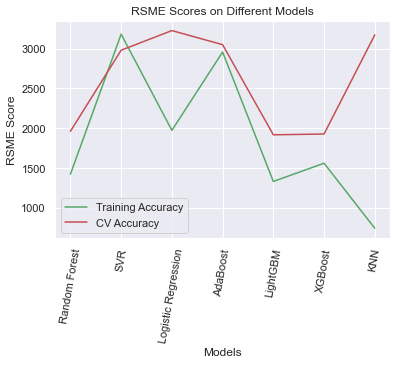

In [ ]:
%matplotlib inline
Models=['Random Forest',"SVR","Logistic Regression","AdaBoost","LightGBM","XGBoost","KNN"]
plt.plot(Models,rmse_train,'-g',label="Training Accuracy")
plt.plot(Models,rmse_cv,'-r',label="CV Accuracy")
#plt.plot(Models,rmse_test,'-c',label="Test Accuracy")
plt.legend()
plt.title("RMSE Scores on Different Models")
plt.xlabel("Models")
plt.ylabel("RMSE Score")
plt.xticks(rotation=80);
plt.show()

##Plotting R2 Scores on Different Models

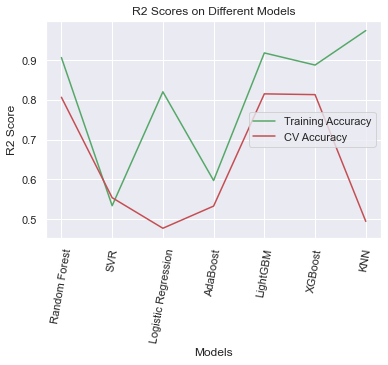

In [ ]:
%matplotlib inline
Models=['Random Forest',"SVR","Logistic Regression","AdaBoost","LightGBM","XGBoost","KNN"]
plt.plot(Models,r2_train,'-g',label="Training Accuracy")
plt.plot(Models,r2_cv,'-r',label="CV Accuracy")
#plt.plot(Models,r2_test,'-c',label="Test Accuracy")
plt.title("R2 Scores on Different Models")
plt.legend()
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.xticks(rotation=80);
plt.show()

##Model 8: Creating an Ensemble of Best Results Obtained Models

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestRegressor

def mean(lst):
  k=np.array(lst)
  return np.mean(k)


modelxgb = XGBRegressor(learning_rate=0.1, n_estimators=100)
modelxgb.fit(X,Y)
y_predxgbts=modelxgb.predict(X_test)

modelrf = RandomForestRegressor(max_depth=25, min_samples_leaf=2, min_samples_split=10,n_estimators=1000)
modelrf.fit(X,Y)
y_predrfts=modelrf.predict(X_test)

modellgbm = LGBMRegressor(n_estimators=300)
modellgbm.fit(X,Y)
y_predlgbmts=modellgbm.predict(X_test)


Y_pred=[]
for i in range(len(Y_test)):
  u=[y_predrfts[i],y_predxgbts[i],y_predlgbmts[i]]
  Y_pred.append(mean(u))

rmse=mean_squared_error(Y_test,Y_pred,squared=False)
r2=r2_score(Y_test, Y_pred)
rmse_test.append(rmse)
r2_test.append(r2)

print("For the ensemble")
print("R2 Score on Test-Data:",r2)
print("RMSE on Test Data:",rmse)


For the ensemble
R2 Score on Test-Data: 0.9132368751706568
RMSE on Test Data: 1348.8339943741935


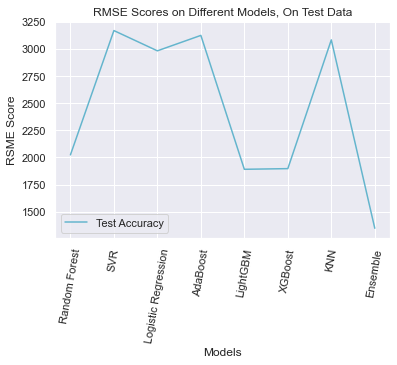

In [ ]:
%matplotlib inline
Models=['Random Forest',"SVR","Logistic Regression","AdaBoost","LightGBM","XGBoost","KNN","Ensemble"]

plt.plot(Models,rmse_test,'-c',label="Test Accuracy")
plt.legend()
plt.title("RMSE Scores on Different Models, On Test Data")
plt.xlabel("Models")
plt.ylabel("RSME Score")
plt.xticks(rotation=80);
plt.show()

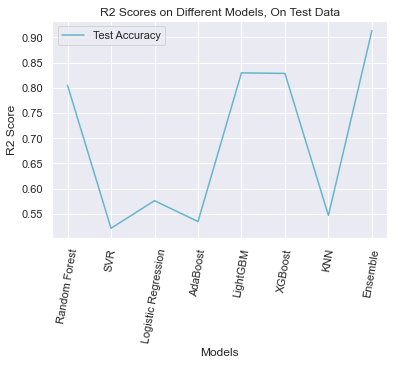

In [ ]:
%matplotlib inline
Models=['Random Forest',"SVR","Logistic Regression","AdaBoost","LightGBM","XGBoost","KNN","Ensemble"]

plt.plot(Models,r2_test,'-c',label="Test Accuracy")
plt.legend()
plt.title("R2 Scores on Different Models, On Test Data")
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.xticks(rotation=80);
plt.show()